## ML-based User Behavior Analysis and Prediction
This project is to explore, analyze and build machine learning models from user behavior data. 
This project analyze the standard VPC Flow Logs from AWS, to detect potential threat from the data file.

### Introduction
Public sector organizations operate external facing applications with broad multi-task user interfaces. There are significant investments made in human-centered design, but new opportunities exist to enhance personalization of the interfaces through machine learning and AI to reduce burden on the public user in navigation and task performance. The problem involves leveraging information from user roles, prior behavior, schedules of required activities, and other characteristics to predict the intended reasons why users are entering a system at any given time, and where they plan to navigate and work. This information would be used to facilitate the users in those navigations.

The objectives of this project are:
+ Clean dirty log data and transform it for analytics.
+ Exploratory data analysis to find user activity levels for different events, and user interaction with web components.
+ Propose any hypothesis and test using selected features.
+ Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
+ Identify user behaviors based on the AI/ML-based predictive models.

### Data Sources
Logfiles from AWS VPC from HealthSoft Inc.
Attack Scan Periods from 2-10-21 File 1.zip,
Attack Scan Periods from 2-10-21 File 2.zip,
Attack Scan Periods from 2-10-21 File 3.zip. 

### Approaches
1. Read data
2. Clean data for processing
3. Statistical analysis
4. Applying machine learning mobels

References: 
1. https://github.com/flatiron-school/cambridge_data_science.git
2. https://github.com/p-neumann/User-Behavior-Analysis-and-Prediction.git
3. https://github.com/p-neumann/Intrusion-and-anomaly-detection-with-machine-learning.git
4. https://github.com/p-neumann/Machine-Learning-with-Python.git
5. https://github.com/p-neumann/python-seminar.git
6. https://github.com/p-neumann/log-anomaly-detector.git

In [1]:
import pandas as pd
import os
import json
import datetime
import matplotlib.pyplot as plt
import csv
import numpy as np
%matplotlib inline

First, read and append all the csv files into the dataset

In [2]:
data = []
fileNum = 2
while fileNum < 115: 
    with open('data/logs-insights-results-' + str(fileNum) + '.csv') as f:
        for line in csv.DictReader(f, fieldnames=('timestamp', 'message')):
            data.append(line)
        fileNum += 1

In [3]:
# check keys
data[0]

{'timestamp': '@timestamp', 'message': '@message'}

In [4]:
# check size
len(data)

822226

### Log attributes:
 - account: the account of the user 
 - sourceIP: the ip address of the sender of the message
 - destIP: the receiver of the message
 - interface: the log stream of the message
 - srcPort: internet port of sender
 - dstPort: internet port of receiver
 - protocol: the network protocol used to communicate the message
 - byte: the size of the message
 - packets: number of segments of the message
 - startTime: the integer start time in unix time form
 - timeTook: exact time it took to send the message
 - status: either "ACCEPT" or "REJECT". Accept will be 1 and reject will be represented as 0.

In [5]:
date = []
time = []
account = []
sourceIP = []
destIP = []
interface = []
srcPort = []
dstPort = []
protocol = []
byte = []
packets = []
startTime = []
timeTook = []
status = []

na = None
i = 1

while i < len(data):
    msg = data[i].get('message',na)
    # filter out 'message' with no data
    if 'ACCEPT' in msg or 'REJECT' in msg:
        timeTokens = data[i].get('timestamp',na).split()
        date.append(timeTokens[0])
        time.append(timeTokens[1])
        tokens = msg.split()
        account.append(tokens[1])
        interface.append(tokens[2])
        sourceIP.append(tokens[3])
        destIP.append(tokens[4])
        
        #storing actions
        temp = 5
        tempStr = ''
        while(tokens[temp+1] != "OK"):
            tempStr = tempStr + tokens[temp] + ' '
            temp += 1
        actionTokens = tempStr.split()
        srcPort.append(actionTokens[0])
        dstPort.append(actionTokens[1])
        protocol.append(actionTokens[2])
        packets.append(actionTokens[3])
        byte.append(actionTokens[4])
        startTime.append(int(actionTokens[5]))
        timeTook.append(int(actionTokens[6]) - int(actionTokens[5]))
        if(tokens[temp] == 'ACCEPT'):
            status.append(1)
        else:
            status.append(0)
    i += 1
    
# print label as well
print('Date: ' + date[0])
print('Time: ' + time[0])
print('AWS account: ' + account[0])
print('Network interface: ' + interface[0])
print('Source IP: ' + sourceIP[0])
print('Destination IP: ' + destIP[0])
print('Status: ' + str(status[0]))
print('Source port: ' + srcPort[0])
print('Destination port: ' + dstPort[0])
print('Protocol: ' + protocol[0])
print('Packets of data: ' + packets[0])
print('Size of data: ' + byte[0] + ' bytes')
print('Start time: ' + str(startTime[0]))
print('Time used: ' + str(timeTook[0]) + ' seconds')
print('New size of dataset after filtering: ' + str(len(date)))

Date: 2021-02-10
Time: 18:15:00.000
AWS account: 430405884063
Network interface: eni-0b6ce86ea40aaa41b
Source IP: 50.245.225.205
Destination IP: 172.16.1.52
Status: 1
Source port: 9622
Destination port: 80
Protocol: 6
Packets of data: 5
Size of data: 582 bytes
Start time: 1612980900
Time used: 9 seconds
New size of dataset after filtering: 813100


In [6]:
df = pd.DataFrame({
    "date":date,
    "time":time,
    "account":account,
    "interface":interface,
    "sourceIP":sourceIP,
    "destIP":destIP,
    "srcPort":srcPort,
    "dstPort":dstPort,
    "protocol":protocol,
    "packets":packets,
    "byte":byte,
    "startTime":startTime,
    "timeTook":timeTook,
    "status":status
})

In [7]:
df.head(10)

,date,time,account,interface,sourceIP,destIP,srcPort,dstPort,protocol,packets,byte,startTime,timeTook,status
0,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,9622,80,6,5,582,1612980900,9,1
1,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,9622,6,5,689,1612980900,9,1
2,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,22050,80,6,6,648,1612980900,9,1
3,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,22050,6,5,582,1612980900,9,1
4,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,51466,80,6,8,723,1612980900,9,1
5,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,51466,6,11,10996,1612980900,9,1
6,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,49748,80,6,7,705,1612980900,9,1
7,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,49748,6,13,12958,1612980900,9,1
8,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,18681,80,6,5,572,1612980900,9,1
9,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,18681,6,5,638,1612980900,9,1


### Statistical views of the data

In [8]:
df['timeTook'].describe()

count    813100.000000
mean         14.809075
std           9.398437
min           0.000000
25%          13.000000
50%          13.000000
75%          14.000000
max          61.000000
Name: timeTook, dtype: float64

In [9]:
df['time'].describe()

count           813100
unique            7915
top       19:35:28.000
freq              4880
Name: time, dtype: object

In [10]:
uniqueIP = set()
for i in sourceIP:
    uniqueIP.add(i)
for i in destIP:
    uniqueIP.add(i)
print("There are " + str(len(uniqueIP)) + " unique IP address.")

There are 1654 unique IP address.


#### IP address that appeared the most from source to destination

In [11]:
df.sourceIP.value_counts()

172.16.1.52       358159
172.16.1.196      322741
73.180.143.70      26499
10.3.252.33        23185
50.245.225.205     11925
                   ...  
192.241.222.84         1
23.95.115.89           1
8.210.85.130           1
146.88.240.13          1
128.1.91.93            1
Name: sourceIP, Length: 1654, dtype: int64

<AxesSubplot:>

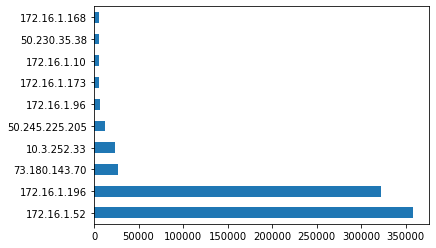

In [12]:
df.sourceIP.value_counts().head(10).plot.barh()

In [13]:
df.destIP.value_counts()

172.16.1.52        359118
172.16.1.196       334239
73.180.143.70       26493
50.245.225.205      11925
172.16.1.241         8379
                    ...  
111.224.235.212         1
81.70.248.168           1
167.172.63.67           1
52.247.201.54           1
35.226.96.71            1
Name: destIP, Length: 212, dtype: int64

<AxesSubplot:>

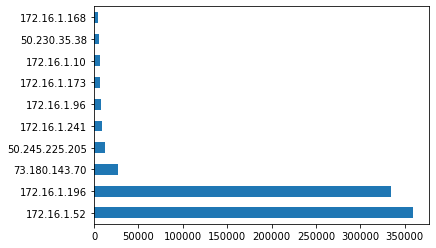

In [14]:
df.destIP.value_counts().head(10).plot.barh()

In [15]:
# 1 is accept, 0 is reject
df.status.value_counts()

1    789081
0     24019
Name: status, dtype: int64

In [16]:
df.time.value_counts()

19:35:28.000    4880
19:35:01.000    4374
19:32:00.000    4227
19:34:00.000    4146
19:33:01.000    4052
                ... 
20:47:33.000       1
21:00:36.000       1
21:37:20.000       1
18:40:53.000       1
18:51:32.000       1
Name: time, Length: 7915, dtype: int64

<AxesSubplot:>

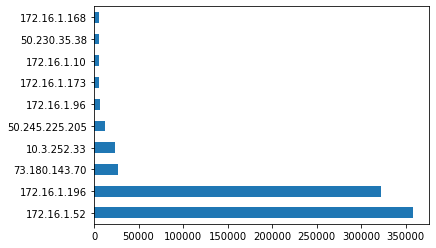

In [17]:
df.sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

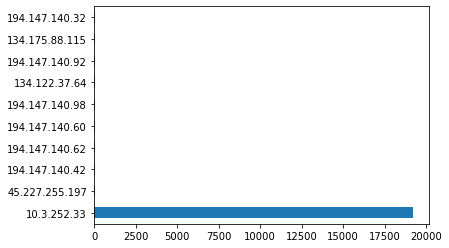

In [18]:
# check on the source ip address for the rejected 
df[df['status']==0].sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

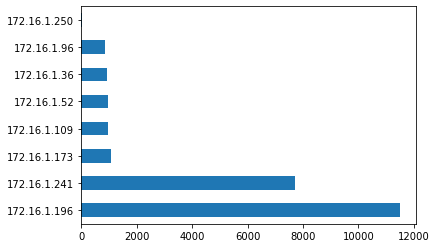

In [19]:
df[df['status']==0].destIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

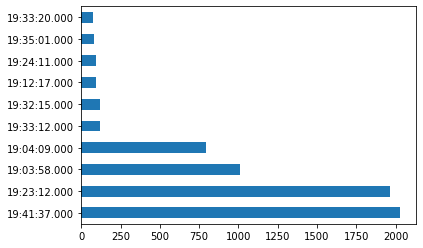

In [20]:
# what time are all the rejections come from
df[df['status']==0].time.value_counts().head(10).plot.barh()

<AxesSubplot:>

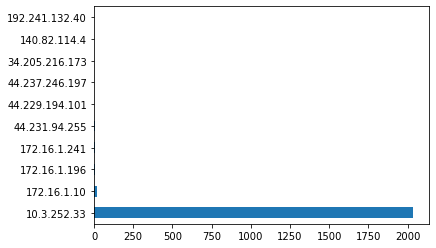

In [21]:
# why is this time has so many rejects? check for the ip address from this time
df[df['time'].str.contains("19:41:37.000")].sourceIP.value_counts().head(10).plot.barh()

<AxesSubplot:>

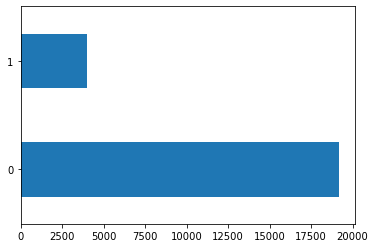

In [22]:
df[df['sourceIP'].str.contains("10.3.252.33")].status.value_counts().plot.barh()
#use lambda to calculate percentage of accept/reject

In [23]:
df['status'].describe()
#how many nodata?

count    813100.000000
mean          0.970460
std           0.169315
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: status, dtype: float64

### Observations:
The IP address 10.3.252.33 seems suspicious as it sends 2000+ requests in 1 second, and most of the rejections come from this address
Further investigation is needed

### Building unsupervised meachine learning model
<font color="red">This section is for demo only. No actually meaning in reality. </font>

In [24]:
df.head()

,date,time,account,interface,sourceIP,destIP,srcPort,dstPort,protocol,packets,byte,startTime,timeTook,status
0,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,9622,80,6,5,582,1612980900,9,1
1,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,9622,6,5,689,1612980900,9,1
2,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,22050,80,6,6,648,1612980900,9,1
3,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,172.16.1.52,50.245.225.205,80,22050,6,5,582,1612980900,9,1
4,2021-02-10,18:15:00.000,430405884063,eni-0b6ce86ea40aaa41b,50.245.225.205,172.16.1.52,51466,80,6,8,723,1612980900,9,1


In [25]:
df.columns

Index(['date', 'time', 'account', 'interface', 'sourceIP', 'destIP', 'srcPort',
       'dstPort', 'protocol', 'packets', 'byte', 'startTime', 'timeTook',
       'status'],
      dtype='object')

<font color="grey">The features we are interested are related to the potential threat to the server, which is the large amount of requests in a small portion of time.
Therefore, startTime and timeTook are the features we are interested.</font>

In [26]:
selected_features = ['startTime','timeTook']
X = df[selected_features].values
y = df['time'].values

In [27]:
print(X[0])

[1612980900          9]


In [28]:
X.shape

(813100, 2)

Using <font color="red">k-means algorithm </font> from 'timeTook' over 'startTime' to group all the data into clusters to better identify the potential threat.

In [29]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
import matplotlib.cbook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [30]:
print(X)

[[1612980900          9]
 [1612980900          9]
 [1612980900          9]
 ...
 [1613001598          8]
 [1613001598          8]
 [1613001596          1]]


In [31]:
print(y)

['18:15:00.000' '18:15:00.000' '18:15:00.000' ... '23:59:58.000'
 '23:59:58.000' '23:59:56.000']


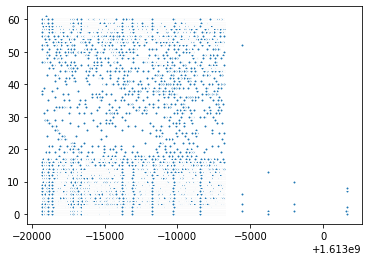

In [32]:
# Scatter plot the data to check
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

[3 3 3 ... 2 2 2]
[[1.61298572e+09 1.48703637e+01]
 [1.61298355e+09 1.36707109e+01]
 [1.61299066e+09 3.04568177e+01]
 [1.61298115e+09 1.74305049e+01]
 [1.61298459e+09 1.35698954e+01]]


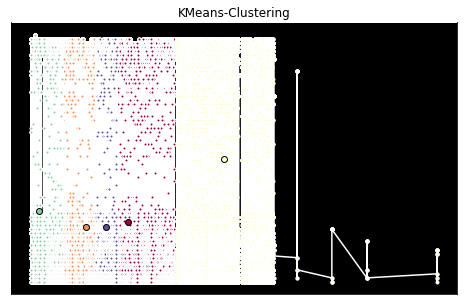

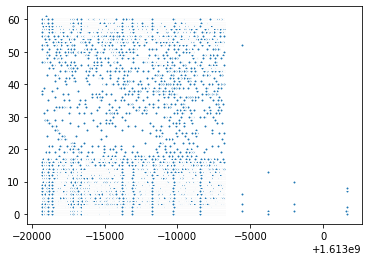

In [33]:
""" 
Set K-Means Clustering, 
n_clusters is number of clusters to form, 
k-means++ for smart way to converge faster
n_init initializes different centroids each run and best output is shown in terms of inertia
"""
n = 5
k_means = KMeans(init="k-means++", n_clusters=n, n_init=15)

# Fit KMeans model with feature matrix, X
k_means.fit(X)

# Grab the labels for each point in the model
k_means_labels = k_means.labels_
print(k_means_labels)

# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
print(k_means_cluster_centers)

# Visualize the Plot
# Initialize plot with the specified dimensions.
fig = plt.figure(figsize=(8, 5))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot with a black background for better visibility
ax = fig.add_subplot(1, 1, 1, facecolor='black')

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in.
for k, col in zip(range(n), colors):
    # Create a list of all data points, where the data points that are in the cluster are labeled as true
    # Else they are labeled as false.
    members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the data points with color col.
    ax.plot(X[members, 0],
            X[members, 1],
            'w',
            markerfacecolor=col,
            marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k',
            markersize=6)

# Title of the plot
ax.set_title('KMeans-Clustering')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Display the scatter plot from above for comparison.
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')


Observation: Cluster 2, 3, and 4 are too packed together??

Now, each log has a label from the cluster they belong, we can group each logs by their labels

In [34]:
df['cluster_label'] = k_means_labels

In [35]:
# df.head(10)

In [36]:
uniqueClusters = set()
for i in k_means_labels:
    uniqueClusters.add(i)
print("There are " + str(len(uniqueClusters)) + " unique clusters.")

There are 5 unique clusters.


In [37]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
for index, line in df.iterrows():
    if   line['cluster_label'] == 0:
        cluster1.append(line)
    elif line['cluster_label'] == 1:
        cluster2.append(line)
    elif line['cluster_label'] == 2:
        cluster3.append(line)
    elif line['cluster_label'] == 3:
        cluster4.append(line)
    elif line['cluster_label'] == 4:
        cluster5.append(line)
print('Size of cluster 1: ' + str(len(cluster1)))
print('Size of cluster 2: ' + str(len(cluster2)))
print('Size of cluster 3: ' + str(len(cluster3)))
print('Size of cluster 4: ' + str(len(cluster4)))
print('Size of cluster 5: ' + str(len(cluster5)))

Size of cluster 1: 306226
Size of cluster 2: 176958
Size of cluster 3: 26446
Size of cluster 4: 37537
Size of cluster 5: 265933


In [38]:
print('Total size of all clusters: ' + str(len(cluster1) + len(cluster2) + len(cluster3) + len(cluster4) + len(cluster5)))
print('Size of dataset: ' + str(len(df)))
print('The sizes matches, each data is put into a dataset')

Total size of all clusters: 813100
Size of dataset: 813100
The sizes matches, each data is put into a dataset


#### Analyze the ip address in clusters

In [39]:
# df[df['cluster_label']==0].sourceIP.value_counts().head(10).plot.barh()

In [40]:
# df[df['cluster_label']==1].sourceIP.value_counts().head(10).plot.barh()

In [41]:
# df[df['cluster_label']==2].sourceIP.value_counts().head(10).plot.barh()

In [42]:
# df[df['cluster_label']==3].sourceIP.value_counts().head(10).plot.barh()

In [43]:
# df[df['cluster_label']==4].sourceIP.value_counts().head(10).plot.barh()

In [44]:
# df[df['sourceIP'].str.contains('73.180.143.70')].time.value_counts().head(10).plot.barh()

In [45]:
# df[df['sourceIP'].str.contains('73.180.143.70')].timeTook.describe()

In [46]:
# df[df['sourceIP'].str.contains('73.180.143.70')].timeTook.value_counts()

<font color="grey">
Observation: although majorly its the internal ports (172.16.1.XXX) that creates the high traffic, there's no attacks detected that could possibly cursh the server.
There are 2 suspicious factors in the data that's abnormal:
1. The rejections from 10.3.252.33 address is too much.
2. The ip address 73.180.143.70 has abnormal behaviors as a normal client as it sends hundreds of requests in different time stamps. Each request's process time is similar and results shiftings the in the cluster. </font>

[This observation is in question]

<hr>

### Applying Supervised Maching Learning Models 
<font color="blue">Apply ML models to identify and predict threats</font>

In [47]:
timeFreq = dict()
for index, line in df.iterrows():
    #filter out the logs that come from the server ip
    if line['sourceIP'] != '50.245.225.205':
        n = int(line['startTime'])
        t = n - 1612980720
        if t in timeFreq.keys():
            timeFreq[t] = timeFreq[t] + 1
        else:
            timeFreq[t] = 1

In [48]:
# timeFreq.keys()
len(timeFreq.keys())

7915

In [49]:
sorted(timeFreq.keys())[len(timeFreq.keys())-5:len(timeFreq.keys())]

[17278, 17279, 20876, 20878, 20879]

Estimated coefficients:
b_0 = -19.183870052877168            
b_1 = 0.018886710188144532


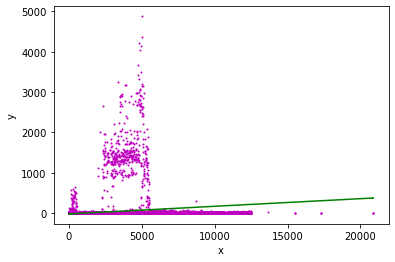

In [50]:
import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 1)
        # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    x = np.array(list(timeFreq.keys()))
    y = np.array(list(timeFreq.values()))
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

#### Observations: 
The linear regression gives the coeficients of 208.8 transactions/second. The graph shows unbalanced relationship. Abnormal behaviors detected around the 5000 second time frame.

In [51]:
sorted(timeFreq.items(), key=lambda x: (-x[1], x[0]))[0:9]
# output: time, counts

[(5008, 4880),
 (4981, 4374),
 (4800, 4227),
 (4920, 4146),
 (4861, 4052),
 (4761, 3678),
 (4941, 3500),
 (4741, 3416),
 (4808, 3314)]

### Analysis on the highest requests/transactions sent

In [52]:
threshold = 1000 
potentialAttackIPs = []
for x,y in timeFreq.items():
    if y > threshold:
        potentialAttackIPs.extend(df[df['startTime'] == (x + 1612980720)].sourceIP.tolist())

In [53]:
len(potentialAttackIPs)

656134

In [54]:
tempDF = pd.DataFrame({
    'potentialAttackIPs':potentialAttackIPs
})

In [55]:
tempDF.value_counts()

potentialAttackIPs
172.16.1.52           317942
172.16.1.196          294729
73.180.143.70          22055
10.3.252.33            14001
50.230.35.38            2248
                       ...  
201.48.128.137             1
201.90.9.90                1
202.169.53.11              1
204.2.134.162              1
97.89.179.98               1
Length: 285, dtype: int64

#### Observations:
Found 2 attacks from these 2 ip address: 172.16.1.52 and 172.16.1.196. Both performed abnormal behaviors to the server, making over thousands of requests within seconds to the server. 

### Non-linear fitting
[to be completed]

### Further Work
Further study is needed to apply various ML models to identify attack pattens based on #of exploits and also behavioral. Eg. a person/account one day access from US, the second day in UK, and the third day from Russia, etc. 